# Title of Example

This notebook is a basic example of using notebooks to create examples. It demonstrates some of ipython's basic features to achieve common Bacalhau tasks. Other more advanced templates are available in the [templates](../templates) directory.

### Why a Notebook?

Notebooks are great because:

* Readers can "execute" the documentation. They can not only read the example, but try it!
* They are testable. We can run the notebook in CI and check that it works.
* They are interactive. Readers can alter the notebooks and play with the code.
* They are great for hackathons. Just point people to the notebook and get hacking.

### What Happens to This Notebook

There are a few CI scripts that operate on notebooks:
* Whenever you push to the main branch on this repository, a github action will automatically render your ipynb's into markdown and push them to the [docs repository](https://github.com/bacalhau-project/docs.bacalhau.org/).
* Whenever you push, pytest will run to ensure that all notebooks execute without error.

### Key Requirements

* We use Python as the kernel for our notebooks. This is the most common kernel and is used in our tests.
* Large datafiles should not be stored in the repo. Store data in either the GCS bucket or IPFS (depending on the example).
* Make sure all cells run successfully to pass tests. If a cell takes a very long time you may want to skip tests. See below.

### Structure

All examples must exist within a directory. The notebook should be called `index.ipynb` (so that it gets rendered as the index.html page in the docs). You may have other supporting files in the directory. For example:

```
basic-template
├── Dockerfile
├── README.md
├── example-image.jpg
├── index.ipynb
└── small-toy-dataset.csv
```

### Metadata

You can control some elements of the documentation rendering by adding metadata to the notebook. This is done by adding a raw cell at the top of the notebook. The metadata is in YAML format. See the top of this file for an example.

## Working With Bash

The following demonstrates how to work with bash commands in a notebook. Note that these commands execute within the context of your kernel. If you don't have the required dependencies installed, you will need to install them first. Read more about [working with bash in notebooks](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-bash).

```bash

In [53]:
%%bash
echo "This is one way of working with bash, which is good because it renders nicely in the documentation"
ls -l

This is one way of working with bash, which is good because it renders nicely in the documentation
total 73456
-rw-r--r-- 1 phil staff       47 Sep 16 10:16 Dockerfile
-rw-r--r-- 1 phil staff        0 Sep 16 09:38 README.md
-rwxr-xr-x 1 phil staff 75054546 Sep 16 11:09 bacalhau
-rw-r--r-- 1 phil staff   137052 Sep 16 09:42 example-image.jpg
-rw-r--r-- 1 phil staff     8731 Sep 16 10:13 index.ipynb
-rw-r--r-- 1 phil staff       94 Sep 16 10:19 myfile.py
-rw-r--r-- 1 phil staff       20 Sep 16 10:31 small-toy-dataset.csv


In [54]:
!echo "But this works too, but remember the ! is rendered in the docs"
!curl https://ifconfig.me/

But this works too, but remember the ! is rendered in the docs
92.4.101.140

## Working with Bacalhau

> Remember that the user's and CI context likely won't have Bacalhau installed, so you need to install it.

Install Bacalhau with the following command:

In [55]:
%%bash
(export BACALHAU_INSTALL_DIR=.; curl -sL https://get.bacalhau.org/install.sh | bash)

Your system is darwin_arm64

BACALHAU CLI is detected:
Client Version: v0.2.3
Server Version: v0.2.3
Reinstalling BACALHAU CLI - ./bacalhau...
Getting the latest BACALHAU CLI...
Installing v0.2.3 BACALHAU CLI...
Verified OK
Extracting tarball ...
NOT verifying Bin
bacalhau installed into . successfully.
Client Version: v0.2.3
Server Version: v0.2.3


In [56]:
%%bash
bacalhau version

Client Version: v0.2.3
Server Version: v0.2.3


In [57]:
%%bash
job_id=$(bacalhau docker run ubuntu echo Hello World)
echo $job_id
echo "Note that bash is executed in a subprocess, so variables are only available within the same cell"

046c478d-d249-47dd-bb90-e804f34aa308
Note that bash is executed in a subprocess, so variables are only available within the same cell


In [58]:
print("We can also do this with Python")
job_id = !bacalhau docker run --wait --wait-timeout-secs 100 ubuntu echo Hello World

We can also do this with Python


In [59]:
print("Which does work across cells", job_id[0])

Which does work across cells e5e41691-3a1b-4f0e-9a67-2584bf319bc4


In [60]:
!bacalhau list --id-filter {job_id[0]}

 CREATED   ID        JOB                      STATE      VERIFIED  PUBLISHED               
 10:10:20  e5e41691  Docker ubuntu echo H...  Published            /ipfs/bafybeidu4zm6w... 


## Working With Images

You can either dump an image right in markdown like this:

![](example-image.jpg)

Or resultant images can be displayed in the notebook using the `Image` class from `IPython.display`. You can also use the `display` function to display other objects.

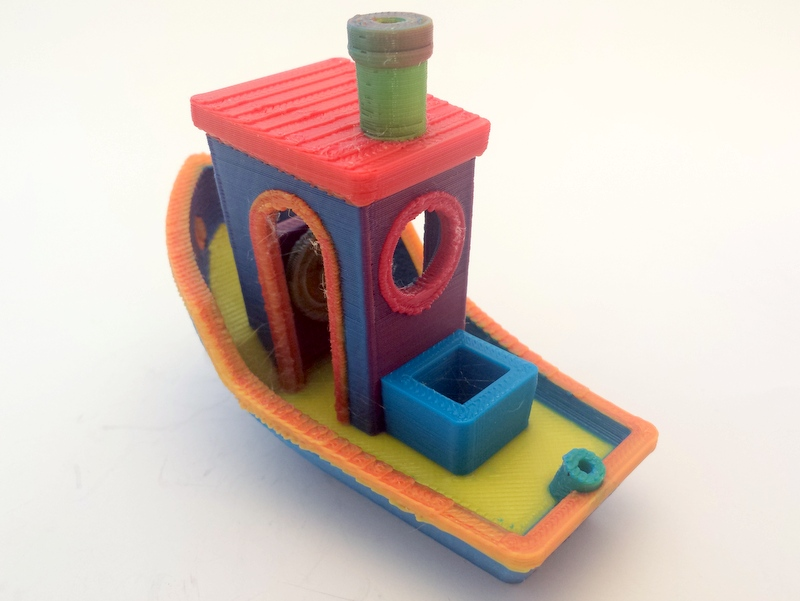

In [61]:
import IPython.display as display
display.Image("example-image.jpg")

## Working With Raw Text Files

When working with raw text files like Dockerfiles, be sure to show these to the user.

In [62]:
%cat Dockerfile

FROM example-dockerfile
RUN echo "do something"

You can even write files directly from your notebook for later use...

In [63]:
%%writefile myfile.py

print("This is code in a newly created python file. Use %%writefile -a to append to files.")

Overwriting myfile.py


In [64]:
%run -i 'myfile.py'

This is code in a newly created python file. Use %%writefile -a to append to files.


## Working With Files

If your file is small, fine, shove it in git. But if it's big, use the production GCS bucket for http-accessible public data or IPFS, whichever makes more sense.

To access files in GCS, you can use the `gsutil` command line tool. You can also use the `gcsfs` library to access GCS from Python. You'll need to make sure you have the correct credentials to access the bucket. This can be done by executing `(cd ops/terraform; bash scripts/connect_workspace.sh production)` from the root of the Bacalhau repository.

When uploading files, please use the same directory structure as this repository to keep things organised. For example, I uploaded a small-toy-dataset.csv using:

```
gsutil cp templates/basic-template/small-toy-dataset.csv gs://bacalhau-examples/templates/basic-template/small-toy-example.csv
```

In [65]:
%%bash
curl -s https://storage.googleapis.com/bacalhau-examples/templates/basic-template/small-toy-example.csv

a,very,small,dataset